
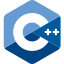
<br>

<div style="text-align:center; font-size:200%;">
  <b>Writing good Unit Tests</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 03 Writing good Unit Tests.ipynb -->
<!-- slides/module_410_unit_testing/topic_165_writing_good_unit_tests.cpp -->


## Mechanics of Unit-Tests

Unit tests should
- be automated: no manual interaction
- be self-testing: pass/fail
- be fine-grained
- be fast
- be isolated
- be executable successfully at any time


## Simple structure!

<ul>
  <li>Simple, standardized structure
    <table style="display:inline;margin:20px 20px;">
    <tr><td style="text-align:left;width:60px;padding-left:15px;">Arrange</td>
        <td style="text-align:left;width:60px;padding-left:15px;border-left:1px solid
        black;">Given</td> <td
        style="text-align:left;width:300px;padding-left:15px;border-left:1px solid
        black;">
          Prepare the test environment</td></tr>
    <tr><td style="text-align:left;padding-left:15px;">Act</td>
        <td style="text-align:left;width:60px;padding-left:15px;border-left:1px solid
        black;">
           When</td>
        <td style="text-align:left;width:300px;padding-left:15px;border-left:1px
        solid black;">
           Execute the action for the test (if any)</td></tr>
    <tr><td style="text-align:left;padding-left:15px;">Assert</td>
        <td style="text-align:left;width:60px;padding-left:15px;border-left:1px solid
        black;">
           Then</td>
        <td style="text-align:left;width:300px;padding-left:15px;border-left:1px
        solid black;">
           Check the results of the action/setup</td></tr>
    </table>
  </li>
  <li>Little code
    <ul>
      <li>Little boilerplate</li>
      <li>Factories, etc. for tests</li>
    </ul>
  </li>
</ul>

In [ ]:
#include "check.h"


- How many tests do we want to have?
- How many values do we want to check?


## Try: Exhaustive testing

- We write exhaustive tests, i.e. tests that cover all possible inputs of a program


- Exhaustive testing is not possible
- Example: password input:
  - Suppose passwords with a maximum of 20 characters are allowed,
    80 input characters are allowed (upper and lower case letters, special
    characters)
  - This results in $80^{20}$ = 115,292,150,460,684,697,600,000,000,000,000,000,000
    possible inputs
  - At 10ns for a test, it would take about $10^{24}$ years to test all inputs
  - The universe is about $1.4 \times 10^{10}$ years old


## Effectiveness and efficiency of tests

- Unit tests should be effective and efficient
  - Effective: The tests should find as many bugs as possible
  - Efficient: We want to find the largest number of bugs with the fewest number of
    tests that are as simple as possible
- Efficiency is important because Tests themselves are code that requires
  maintenance and may contain bugs


## How to write good unit tests?

- Test observable behavior, not implementation
- Prefer tests of values to tests of states
- Prefer tests of states to tests of interaction
- Use test doubles if (but only if) a dependency "launches a missile"
- (These rules assume that the code allows such tests)


### Why test observable behavior and not implementation?

Observable behavior
-  is easier to understand
-  is more stable than implementation
-  is closer to customer benefit


## Test observable behavior, not implementation

- Abstract implementation details as much as possible
  - Also at unit test level
- Often different methods test each other
- This sometimes requires the introduction of additional methods
    - These methods should be useful for users not only for testing
    - Often "abstract state" of objects
    - **Do not** simply make the concrete state public.

In [ ]:
#include <vector>

In [ ]:
class Stack
{
private:
    std::vector<int> _items;

public:
    void push(int new_item) { _items.push_back(new_item); }

    int pop();

    // Good extension: useful, doesn't expose implementation
    int size() const { return _items.size(); }

    // Bad extension: exposes implementation
    std::vector<int>& get_items() { return _items; }
};

In [ ]:
int Stack::pop()
{
    if (_items.empty())
    {
        throw std::out_of_range("Stack is empty");
    }
    int val = _items.back();
    _items.pop_back();
    return val;
}


### Tests when only `push()` and `pop()` are available


## Values > State > Interaction

- More understandable
- Easier to test
- Often more stable compared to refactorings

Exception: testing protocols


### Functions/Values

In [ ]:
int add(int x, int y) { return x + y; }


### State

In [ ]:
class Adder
{
public:
    void set_x(int x) { x_ = x; }
    void set_y(int y) { y_ = y; }
    void add() { result_ = x_ + y_; }
    int get_result() const { return result_; }

private:
    int x_{0};
    int y_{0};
    int result_{0};
};


### Side effect/Interaction

- With interface

In [ ]:
class AbstractAdder
{
public:
    virtual void add(int x, int y) = 0;
};

In [ ]:
class InteractionAdder
{
public:
    InteractionAdder(AbstractAdder& adder) : adder_{adder} {}

    void add(int x, int y) { adder_.add(x, y); }

private:
    AbstractAdder& adder_;
};


Test requires mock/spy


### Side effect/Interaction

- Without interface

In [ ]:
void add_and_print(int x, int y) { std::cout << x + y << std::endl; }


- See `code/completed/test_examples/fun_state_interact_test.cpp` for
  the test code


## How do you write testable code?

- Move from less-testable to more-testable style
  - Observability (`state_machine.h`)
  - No global or static data
  - Immutable data structures (values)
- Good object-oriented design
  - High cohesion
  - Low coupling, management of dependencies
- Etc.


## Process

- Iterative approach
  - Small steps with tests
- Test-Driven Development (TDD)
  - Writing tests before code


## Mini-workshop: Better testability

- How can you write tests for the following functions/classes?
- How can you improve the following functions/classes to make them more
  testable?
- What disadvantages result from this?

In [ ]:
#include <iostream>

In [ ]:
int count()
{
    static int c = 0;
    return c++;
}

In [ ]:
for (int i = 0; i < 3; ++i)
{
    std::cout << count() << std::endl;
}

In [ ]:
enum class State
{
    OFF,
    ON
};

In [ ]:
class Switch
{
public:
    void toggle()
    {
        state_ = state_ == State::OFF ? State::ON : State::OFF;
        std::cout << "Switch is " << (state_ == State::OFF ? "OFF" : "ON") << std::endl;
    }

private:
    State state_{State::OFF};
};

In [ ]:
Switch s;

In [ ]:
for (int i = 0; i < 3; ++i)
{
    s.toggle();
}

In [ ]:
void print_fib(int n)
{
    int a{0};
    int b{1};
    for (int i{0}; i < n; ++i)
    {
        std::cout << "fib(" << i << ") = " << b << std::endl;
        int tmp{a};
        a = b;
        b = tmp + b;
    }
}

In [ ]:
print_fib(5);